<a href="https://colab.research.google.com/github/gplinkage/DataScienceBootCamp/blob/main/Class%20Notes/Churn_Modelling_Deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
df= pd.read_csv('/content/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [168]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


[Text(0, 0, 'Not Exited'), Text(1, 0, 'Exited')]

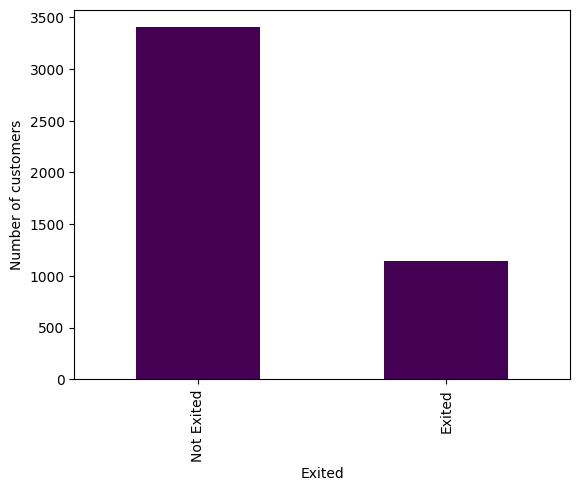

In [169]:
ax = df.groupby('Exited')['Gender'].apply(lambda x: (x == 'Female').sum()).plot(kind='bar', ylabel='Number of customers', colormap= 'viridis')
ax.set_xticklabels(['Not Exited', 'Exited'])

<Axes: xlabel='Geography'>

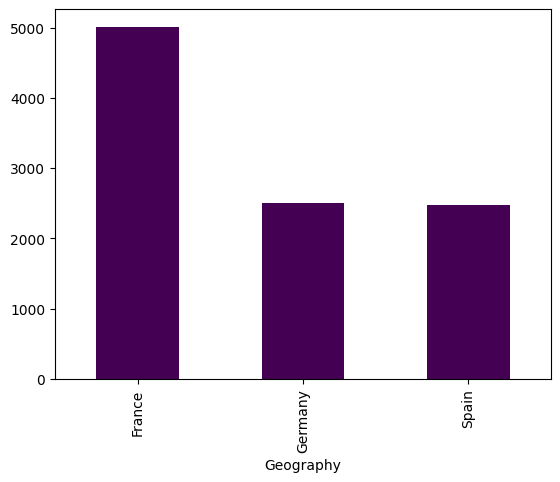

In [170]:
from matplotlib.rcsetup import Colormap
df.groupby('Geography')['Exited'].count().plot(kind = 'bar', colormap= 'viridis')

<Axes: xlabel='Gender'>

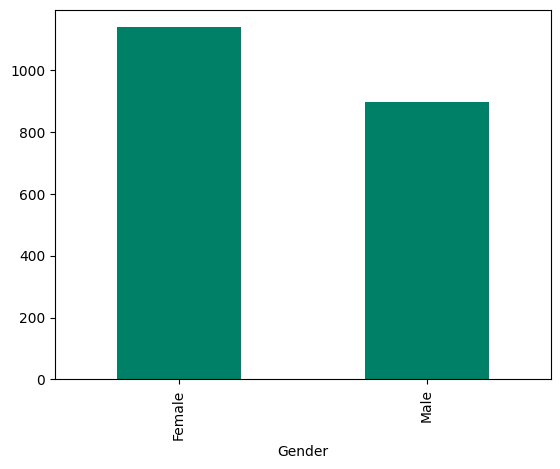

In [171]:
df[df['Exited'] == 1].groupby('Gender').size().plot(kind='bar', colormap= 'summer')

In [191]:
x = df.iloc[:, 3:-1].values
y= df.iloc[:, -1].values

In [192]:
# Catagorical data - Gender- Laber Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 2] = le.fit_transform(x[:, 2])

In [193]:
# Catagorical data - Geography- OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct= ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder= 'passthrough')
x= np.array(ct.fit_transform(x))

In [194]:
# Train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [195]:
#feature selection
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [196]:
#Artificial Neural Network
import tensorflow as tf

In [197]:
tf.__version__

'2.13.0'

In [198]:
# Building Artificial Neural Network

ann= tf.keras.models.Sequential()

In [199]:
# adding first hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))


In [200]:
# adding second hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))


In [201]:
# adding third hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [202]:
# adding third hidden layer
ann.add(tf.keras.layers.Dense(units=100, activation='relu'))

In [203]:
# adding output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [207]:
# Compile ANN
# ann.compile(optimizer= 'adam', loss = 'binary_crossentropy', metrics= ['accuracy'])
ann.compile(optimizer= 'sgd', loss = 'binary_crossentropy', metrics= ['accuracy'])

In [208]:
# Training the ANN on the traning set

ann.fit(x_train, y_train, batch_size=32, epochs=25)

Epoch 1/25
250/250 [==============================] - 1s 1ms/step - loss: 0.0737 - accuracy: 0.9740
Epoch 2/25
250/250 [==============================] - 0s 1ms/step - loss: 0.0617 - accuracy: 0.9810
Epoch 3/25
250/250 [==============================] - 0s 2ms/step - loss: 0.0572 - accuracy: 0.9824
Epoch 4/25
250/250 [==============================] - 0s 1ms/step - loss: 0.0546 - accuracy: 0.9837
Epoch 5/25
250/250 [==============================] - 0s 1ms/step - loss: 0.0522 - accuracy: 0.9845
Epoch 6/25
250/250 [==============================] - 0s 1ms/step - loss: 0.0501 - accuracy: 0.9849
Epoch 7/25
250/250 [==============================] - 0s 1ms/step - loss: 0.0483 - accuracy: 0.9858
Epoch 8/25
250/250 [==============================] - 0s 1ms/step - loss: 0.0466 - accuracy: 0.9862
Epoch 9/25
250/250 [==============================] - 0s 1ms/step - loss: 0.0453 - accuracy: 0.9871
Epoch 10/25
250/250 [==============================] - 0s 1ms/step - loss: 0.0439 - accuracy: 0.9883